In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier



In [108]:
#Load Datasets
datasets = pd.DataFrame (pd.read_csv('/content/drive/MyDrive/ADATA2/cirrhosis.csv'))
feature_names = datasets.columns

datasets.head()


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [109]:
#DATASTES BASIC INFO
datasets.shape
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [110]:
# Initial dataset size
initial_rows, initial_cols = datasets.shape
datasets.shape

(418, 20)

In [111]:
#Takes care of duplicates and null values

duplicates_amount = datasets.duplicated().sum()
if duplicates_amount > 0:
  print(f"{duplicates_amount} amount of dulicated rows detected at the database. Removing the Duplicates")
  datasets.drop_duplicates(inplace=True)
  print("Duplicates Remove!")

if duplicates_amount <=0:
  print("No Duplicates")

nullval_amount = datasets.isnull().sum().sum()
if nullval_amount > 0:
  print(f"{nullval_amount} amount of Null values detected at the database. Taking care of the Nulls")
  datasets.dropna(inplace=True)
  print("Null Remove!")

if nullval_amount <=0:
  print("No Null Values")

# Updated dataset size
updated_rows, updated_cols = datasets.shape

datasets.shape

No Duplicates
1033 amount of Null values detected at the database. Taking care of the Nulls
Null Remove!


(276, 20)

In [112]:
# Display basic information about the dataset after cleaning
print("\nDataset Info After Cleaning Null and Duplicates:")
print(datasets.info())

# Display summary statistics of the dataset after cleaning
print("\nSummary Statistics After Cleaning:")
print(datasets.describe())

# Summary of cleaning process
print("\nCleaning Summary:")
print(f"Original Dataset Size: {initial_rows} rows, {initial_cols} columns")
print(f"Updated Dataset Size: {updated_rows} rows, {updated_cols} columns")
print(f"Number of Rows Removed: {initial_rows - updated_rows}")
print(f"Number of Columns Removed: {initial_cols - updated_cols}")


Dataset Info After Cleaning Null and Duplicates:
<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             276 non-null    int64  
 1   N_Days         276 non-null    int64  
 2   Status         276 non-null    object 
 3   Drug           276 non-null    object 
 4   Age            276 non-null    int64  
 5   Sex            276 non-null    object 
 6   Ascites        276 non-null    object 
 7   Hepatomegaly   276 non-null    object 
 8   Spiders        276 non-null    object 
 9   Edema          276 non-null    object 
 10  Bilirubin      276 non-null    float64
 11  Cholesterol    276 non-null    float64
 12  Albumin        276 non-null    float64
 13  Copper         276 non-null    float64
 14  Alk_Phos       276 non-null    float64
 15  SGOT           276 non-null    float64
 16  Tryglicerides  276 non-null    float64
 17  Platelets

In [113]:
#Converts the

label_encoder = LabelEncoder()
for column in datasets.columns:
    datasets[column] = label_encoder.fit_transform(datasets[column])

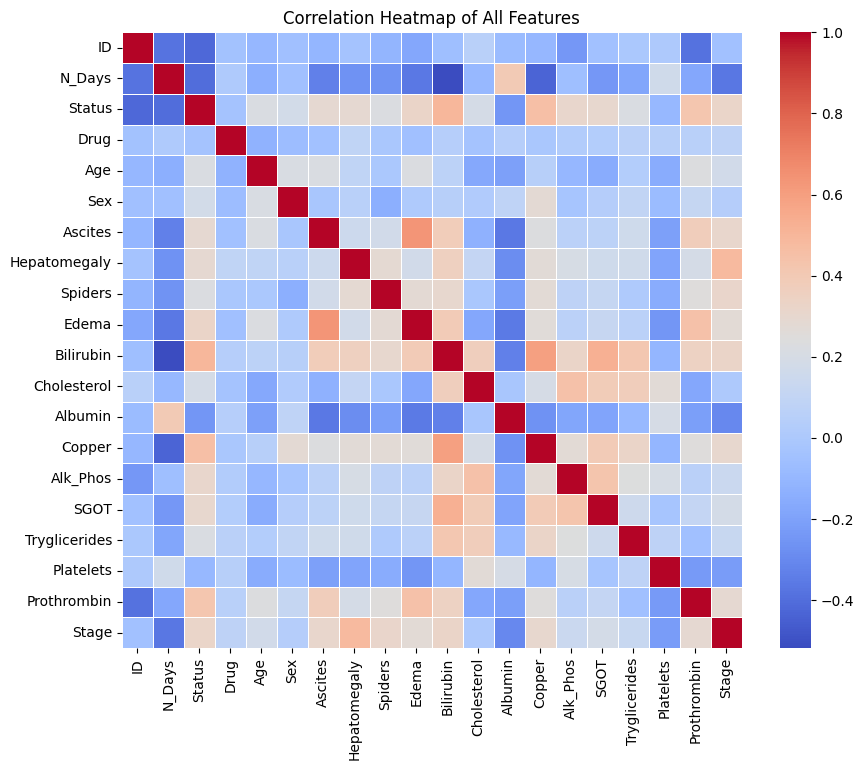

In [114]:
# Calculate correlation matrix before outliers removal
correlation_matrix_all = datasets.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_all, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

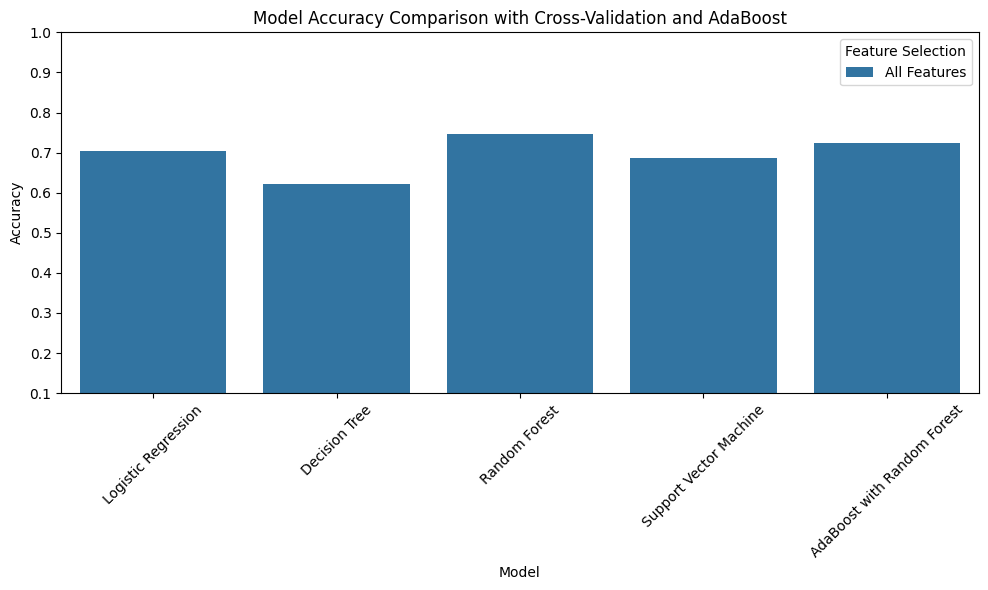

Scores with cross-validation and AdaBoost:
Logistic Regression: 70.45%
Decision Tree: 62.27%
Random Forest: 74.55%
Support Vector Machine: 68.64%
AdaBoost with Random Forest: 72.27%


In [115]:
# Original Cross validation with ADABOOSTING

X = datasets[[ 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',
    'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides',
    'Platelets', 'Prothrombin'
]]  # Assuming the target column is not included in the features
y = datasets['Status']  # Assuming 'target_column' is the name of the column containing the target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=50)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000000, random_state=50),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=50),
    "Random Forest": RandomForestClassifier(random_state=50),
    "Support Vector Machine": SVC(random_state=50)
}

# Train and evaluate models with stratified cross-validation
results = {}
for name, model in models.items():
    # Use cross-validation to evaluate the model
    scores = cross_val_score(model, X_train, y_train, cv=5)
    results[name] = scores.mean()

# Find the highest scoring model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

# Apply AdaBoost to the highest scoring model
adaboost = AdaBoostClassifier(estimator=best_model, random_state=50)
scores_adaboost = cross_val_score(adaboost, X_train, y_train, cv=5)
adaboost_score = scores_adaboost.mean()

# Append AdaBoost results to the dictionary
results["AdaBoost with " + best_model_name] = adaboost_score

# Create a DataFrame for plotting
results_datasets = pd.DataFrame({
    "Model": list(results.keys()),
    "Accuracy": list(results.values()),
    "Feature Selection": ['All Features'] * len(results)
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=results_datasets, x='Model', y='Accuracy', hue='Feature Selection')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison with Cross-Validation and AdaBoost')
plt.xticks(rotation=45)
plt.ylim(0.1, 1.0)
plt.legend(title='Feature Selection')
plt.tight_layout()
plt.show()

# Print scores with cross-validation
print("Scores with cross-validation and AdaBoost:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy*100:.2f}%")


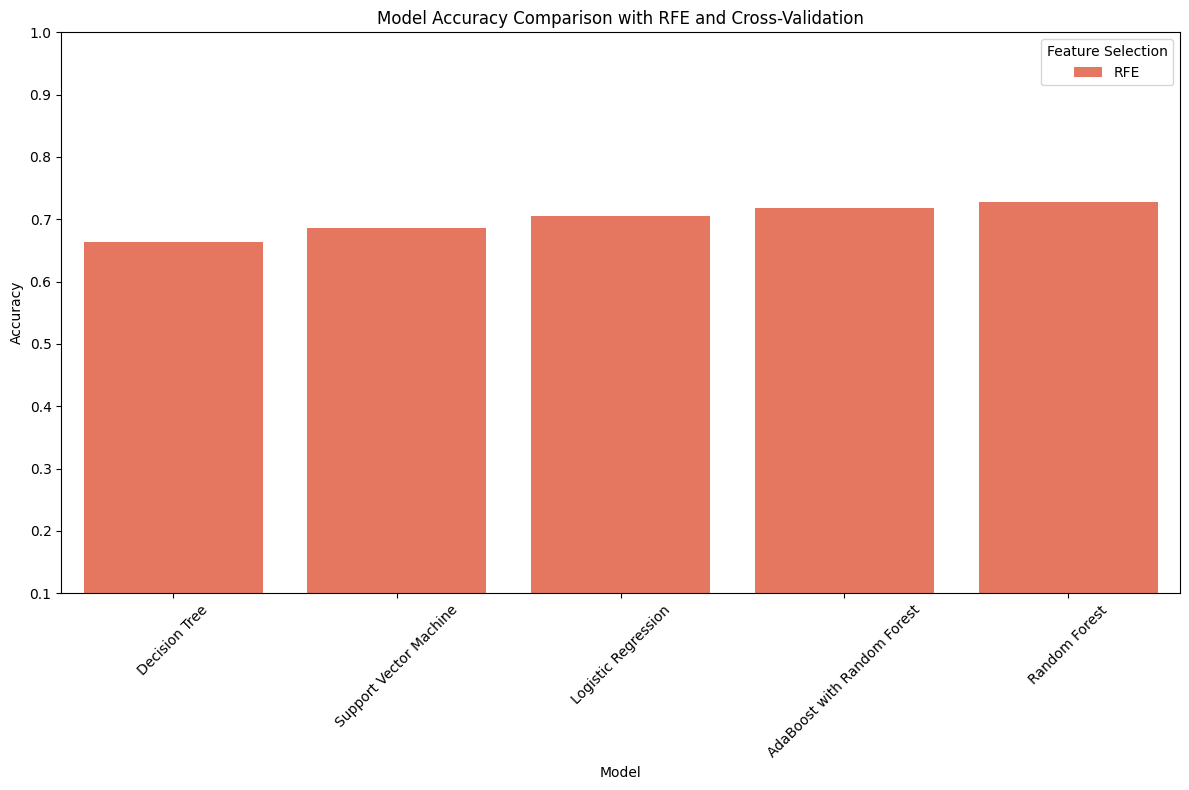

Scores with cross-validation and RFE (sorted):
1. Random Forest: 72.73%
2. AdaBoost with Random Forest: 71.82%
3. Logistic Regression: 70.45%
4. Support Vector Machine: 68.64%
5. Decision Tree: 66.36%


In [116]:
# WITH RFE



# Initialize the RFE with Logistic Regression as the estimator
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=10)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000000, random_state=50),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=50),
    "Random Forest": RandomForestClassifier(random_state=50),
    "Support Vector Machine": SVC(random_state=50)
}

# Train and evaluate models with stratified cross-validation
resultsRFE = {}
for name, model in models.items():
    # Create a pipeline with RFE and the model
    pipeline = Pipeline(steps=[('rfe', rfe), ('model', model)])

    # Use cross-validation to evaluate the pipeline
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    resultsRFE[name] = scores.mean()

# Find the highest scoring model
best_model_nameRFE = max(resultsRFE, key=resultsRFE.get)
best_modelRFE = models[best_model_nameRFE]

# Apply AdaBoost to the highest scoring model
adaboost = AdaBoostClassifier(estimator=best_modelRFE, random_state=50)
pipeline_adaboost = Pipeline(steps=[('rfe', rfe), ('model', adaboost)])
scores_adaboost = cross_val_score(pipeline_adaboost, X_train, y_train, cv=5)
adaboost_score = scores_adaboost.mean()

# Append AdaBoost results to the dictionary
resultsRFE["AdaBoost with " + best_model_nameRFE] = adaboost_score

# Create a DataFrame for plotting
results_datasetsRFE = pd.DataFrame({
    "Model": list(resultsRFE.keys()),
    "Accuracy": list(resultsRFE.values()),
    "Feature Selection": ['RFE'] * len(resultsRFE)
})

# Sort the DataFrame by accuracy
results_datasetsRFE = results_datasetsRFE.sort_values(by='Accuracy')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=results_datasetsRFE, x='Model', y='Accuracy', hue='Feature Selection', palette="Reds")
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison with RFE and Cross-Validation')
plt.xticks(rotation=45)
plt.ylim(0.1, 1.0)
plt.legend(title='Feature Selection')
plt.tight_layout()
plt.show()

# Print scores with cross-validation in descending order of accuracy
sorted_results = sorted(resultsRFE.items(), key=lambda item: item[1], reverse=True)
print("Scores with cross-validation and RFE (sorted):")
for rank, (name, accuracy) in enumerate(sorted_results, 1):
    print(f"{rank}. {name}: {accuracy*100:.2f}%")

Scores with cross-validation and AdaBoost:
1. Random Forest (WITHOUT RFE): 74.55%
2. Random Forest (WITH RFE): 72.73%
3. AdaBoost with Random Forest (WITHOUT RFE): 72.27%
4. AdaBoost with Random Forest (WITH RFE): 71.82%
5. Logistic Regression (WITH RFE): 70.45%
6. Logistic Regression (WITHOUT RFE): 70.45%
7. Support Vector Machine (WITHOUT RFE): 68.64%
8. Support Vector Machine (WITH RFE): 68.64%
9. Decision Tree (WITH RFE): 66.36%
10. Decision Tree (WITHOUT RFE): 62.27%

Best performing model: Random Forest (WITHOUT RFE), Accuracy: 74.55%


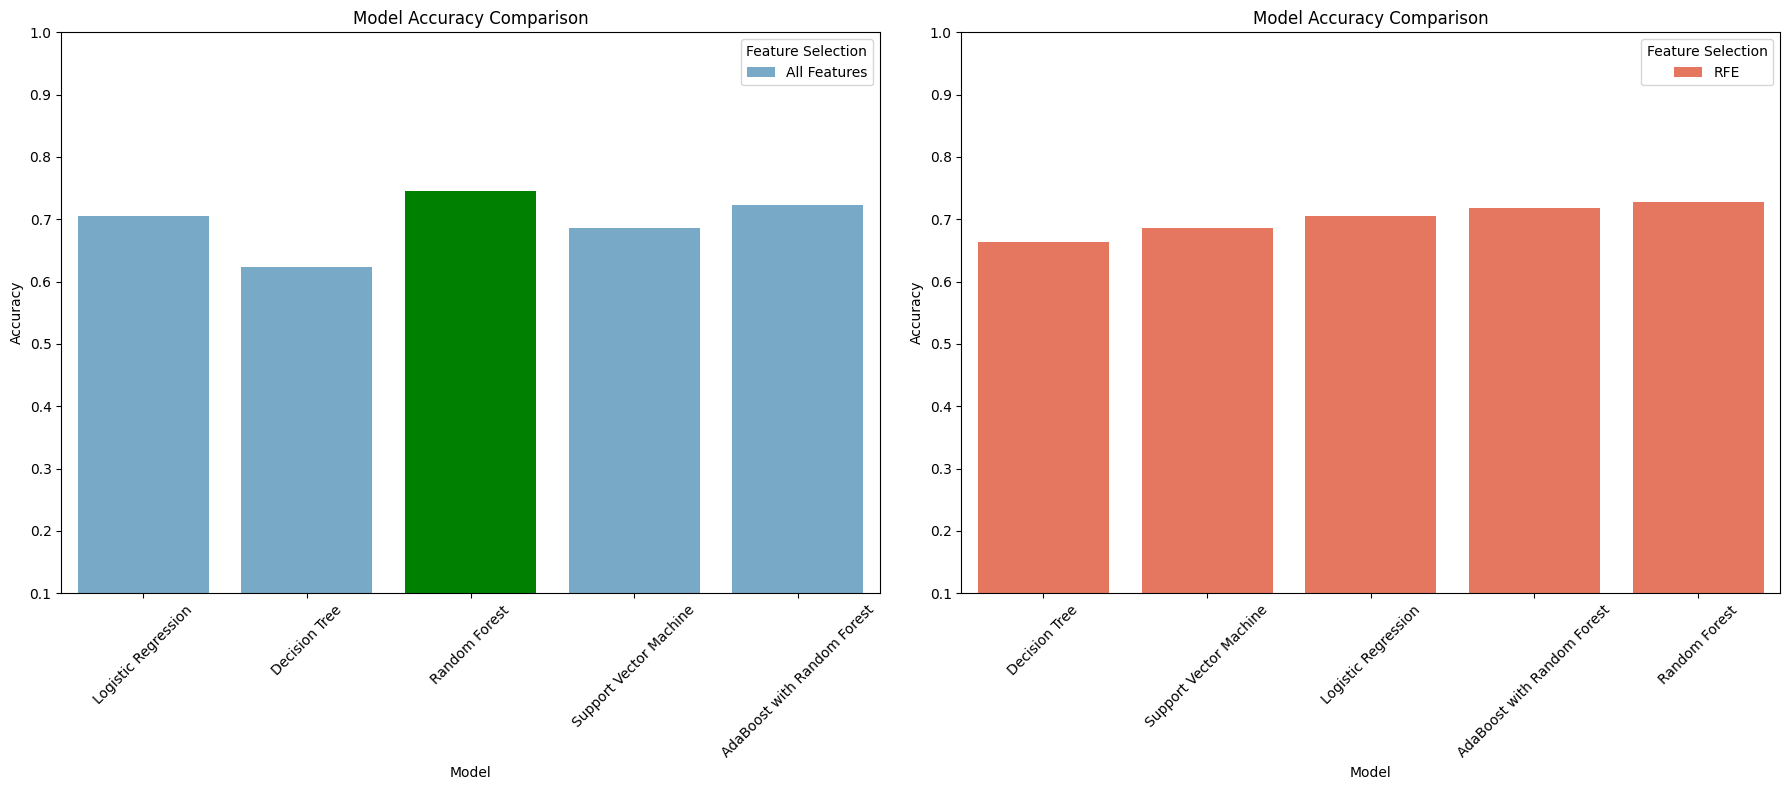

In [120]:
# Combine the results from both with and without RFE, ensuring each model is uniquely identified
combined_results = {f"{name} (WITHOUT RFE)": accuracy for name, accuracy in results.items()}
combined_results.update({f"{name} (WITH RFE)": accuracy for name, accuracy in resultsRFE.items()})

# Sort the combined results by accuracy
sorted_combined_results = sorted(combined_results.items(), key=lambda item: item[1], reverse=True)

# Print scores with cross-validation and AdaBoost with and without RFE, ranked together
print("Scores with cross-validation and AdaBoost:")
for rank, (name, accuracy) in enumerate(sorted_combined_results, 1):
    if "(WITH RFE)" in name:
        print(f"\033[91m{rank}. {name}: {accuracy*100:.2f}%\033[0m")  # Red color for WITH RFE
    else:
        print(f"\033[94m{rank}. {name}: {accuracy*100:.2f}%\033[0m")  # Blue color for WITHOUT RFE

# Print the best performing model
best_model_name, best_model_accuracy = sorted_combined_results[0]
print(f"\nBest performing model: {best_model_name}, Accuracy: {best_model_accuracy*100:.2f}%")

# Plotting both results side by side
plt.figure(figsize=(18, 8))

# Plotting results without RFE
plt.subplot(1, 2, 1)
sns.barplot(data=results_datasets, x='Model', y='Accuracy', hue='Feature Selection', palette="Blues")
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0.1, 1.0)
plt.legend(title='Feature Selection')

# Plotting results with RFE
plt.subplot(1, 2, 2)
sns.barplot(data=results_datasetsRFE, x='Model', y='Accuracy', hue='Feature Selection', palette="Reds")
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0.1, 1.0)
plt.legend(title='Feature Selection')

# Highlighting the best performing bar in green
for ax in plt.gcf().axes:
    bars = ax.patches
    for bar in bars:
        if bar.get_height() == best_model_accuracy:
            bar.set_facecolor('green')

plt.tight_layout()
plt.show()